In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
x, y = data['data'], data['target']

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [13]:
def draw_rm_and_price():
    plt.scatter(x[:, 5], y)

In [14]:
import random

In [19]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

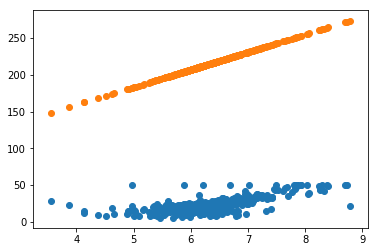

In [22]:
x_rm = x[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)

In [28]:
def loss(y,y_hat):
    return sum((y_i-y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

## First-Method: Random generation: get best k and best b

In [32]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 34.37849177199743 best_b: -72.0170357562501, and the loss is: 15122.188869945974
When time is : 3, get best_k: 4.304910071355735 best_b: -29.53339022498551, and the loss is: 680.5096688262051
When time is : 19, get best_k: 1.0182510797595086 best_b: 36.325604960774, and the loss is: 483.519863620779
When time is : 24, get best_k: 11.069564347216755 best_b: -33.05952383763983, and the loss is: 240.83166855828551
When time is : 100, get best_k: 18.143107775775817 best_b: -83.80089050334843, and the loss is: 142.99558337279126
When time is : 119, get best_k: 16.470219099533495 best_b: -75.49729288869727, and the loss is: 100.37020494316927
When time is : 354, get best_k: 4.073299108730026 best_b: -1.0034167125310631, and the loss is: 60.3161419771681
When time is : 418, get best_k: 7.17751803832121 best_b: -25.007816083747116, and the loss is: 51.34279835366271
When time is : 496, get best_k: 11.692555669773299 best_b: -51.67961820372393, and the loss is: 47.

## 方法一图像

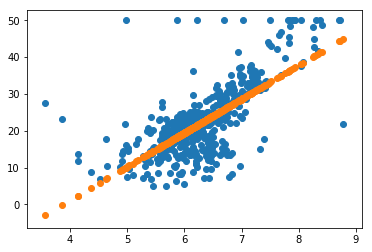

In [33]:
x_rm = x[:, 5]
k = 9.193791618649499
b = -35.70327768273354
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

## 2nd-Method: Direction Adjusting

In [69]:
trying_times = 2000

min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b =  random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

scalar = 0.1

update_time = 0

next_direction = random.choice(direction)

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_random_k_and_b = [price(r, current_k, current_b) for r in x_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        next_direction = next_direction
        update_time += 1

        if update_time % 10 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)
        
        

When time is : 11, get best_k: 72.76981307627949 best_b: 10.846458227987071, and the loss is: 200640.53092000986
When time is : 21, get best_k: 71.76981307627955 best_b: 9.846458227987075, and the loss is: 194138.62549944845
When time is : 31, get best_k: 70.7698130762796 best_b: 8.846458227987078, and the loss is: 187743.8372656344
When time is : 41, get best_k: 69.76981307627966 best_b: 7.846458227987082, and the loss is: 181456.1662185675
When time is : 51, get best_k: 68.76981307627972 best_b: 6.846458227987085, and the loss is: 175275.6123582476
When time is : 61, get best_k: 67.76981307627977 best_b: 5.846458227987089, and the loss is: 169202.17568467488
When time is : 71, get best_k: 66.76981307627983 best_b: 4.8464582279870925, and the loss is: 163235.85619784897
When time is : 81, get best_k: 65.76981307627989 best_b: 3.846458227987095, and the loss is: 157376.65389777013
When time is : 91, get best_k: 64.76981307627995 best_b: 2.8464582279870942, and the loss is: 151624.56878

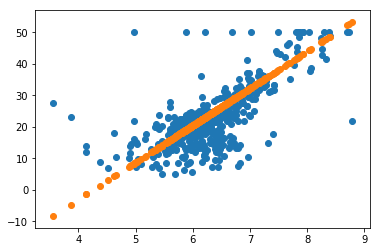

In [70]:
x_rm = x[:, 5]
k = 11.769813076279318
b = -50.15354177201335
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

## 导数

In [71]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [77]:
trying_times = 2000

# X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-02

update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(x_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(x_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 11.569813076279319 best_b: -50.35354177201335, and the loss is: 392313.56449306716
When time is : 50, get best_k: 11.569813076279319 best_b: -50.35354177201335, and the loss is: 43.61871247348817
When time is : 100, get best_k: 11.569813076279319 best_b: -50.35354177201335, and the loss is: 43.61828091674787
When time is : 150, get best_k: 11.569813076279319 best_b: -50.35354177201335, and the loss is: 43.6178596151848
When time is : 200, get best_k: 11.569813076279319 best_b: -50.35354177201335, and the loss is: 43.61744832510284
When time is : 250, get best_k: 11.569813076279319 best_b: -50.35354177201335, and the loss is: 43.617046808597046
When time is : 300, get best_k: 11.569813076279319 best_b: -50.35354177201335, and the loss is: 43.616654833415765
When time is : 350, get best_k: 11.569813076279319 best_b: -50.35354177201335, and the loss is: 43.61627217282643
When time is : 400, get best_k: 11.569813076279319 best_b: -50.35354177201335, and the lo

## 图像

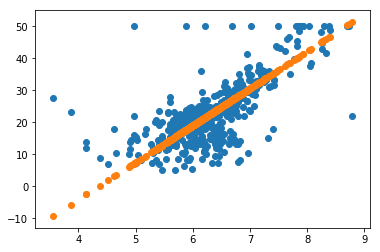

In [78]:
x_rm = x[:, 5]
k = 11.569813076279319
b = -50.35354177201335
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

## 绝对值求导

In [ ]:
def abs_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def abs_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient